In [1]:
#Physics Informed Machine Learning code to solve the differential equation 
#Written by Morteza Sadehi, morteza.sadeghi@mat.ethz.ch
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
class PINN(tf.keras.Model):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(PINN, self).__init__()

        # Define the input layer
        self.input_layer = tf.keras.layers.InputLayer(input_shape=(input_dim,), dtype=tf.float32)

        # Define the hidden layers
        self.hidden_layers = []
        for i in range(len(hidden_dim)):
            self.hidden_layers.append(tf.keras.layers.Dense(hidden_dim[i], activation='tanh'))

        # Define the output layer
        self.output_layer = tf.keras.layers.Dense(output_dim)
        
    def call(self, X):
        x = self.input_layer(X)
        for layer in self.hidden_layers:
            x = layer(x)
        output = self.output_layer(x)
        return output

In [3]:
def loss(x,model):
    with tf.GradientTape() as tape:
        # Watch input variables
        tape.watch(x)
        y=model.call(x)
        
    dy_dx = tape.gradient(y, x)

    
    residual=dy_dx-x
    loss=tf.reduce_mean(tf.square(residual))
    return loss

In [4]:
def boundary_loss(x_bc, model, y_bc):
    y_pred = model.call(x_bc)
    bc_loss = tf.reduce_mean(tf.square(y_pred - y_bc))
    return bc_loss

In [5]:
input_dim = 1
hidden_dim = [64,64,64]
output_dim = 1
model = PINN(input_dim, hidden_dim, output_dim)

In [6]:
x_min, x_max = 0.0, 1.0
N = 150
x = tf.linspace(x_min, x_max, N)
x=tf.expand_dims(x,axis=1)

In [9]:
x_bc=np.array([[0]]); y_bc=0

tf.Tensor(0.0, shape=(), dtype=float32)


In [10]:
def train(x,model,x_bc,y_bc):
    with tf.GradientTape() as tape:
        cost=loss(x,model)
        cost+=boundary_loss(x_bc, model, y_bc)
        
    
    gradients = tape.gradient(cost, model.trainable_variables) 
    optimizer = tf.keras.optimizers.Adam()
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    return cost

In [11]:
num_epochs = 50000
for epoch in range(num_epochs):
    cost = train(x,model,x_bc,y_bc)
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, loss = {cost.numpy():.6f}")

Epoch 0, loss = 0.377168
Epoch 1000, loss = 0.015178
Epoch 2000, loss = 0.010481
Epoch 3000, loss = 0.008396
Epoch 4000, loss = 0.007748
Epoch 5000, loss = 0.006765
Epoch 6000, loss = 0.006312
Epoch 7000, loss = 0.005775
Epoch 8000, loss = 0.004742
Epoch 9000, loss = 0.004605
Epoch 10000, loss = 0.004170
Epoch 11000, loss = 0.003995
Epoch 12000, loss = 0.003601
Epoch 13000, loss = 0.003172
Epoch 14000, loss = 0.003403
Epoch 15000, loss = 0.003312
Epoch 16000, loss = 0.002775
Epoch 17000, loss = 0.002741
Epoch 18000, loss = 0.002703
Epoch 19000, loss = 0.002484
Epoch 20000, loss = 0.002064
Epoch 21000, loss = 0.002404
Epoch 22000, loss = 0.002022
Epoch 23000, loss = 0.001621
Epoch 24000, loss = 0.001891
Epoch 25000, loss = 0.001778
Epoch 26000, loss = 0.001794
Epoch 27000, loss = 0.001671
Epoch 28000, loss = 0.001557
Epoch 29000, loss = 0.001558
Epoch 30000, loss = 0.001547
Epoch 31000, loss = 0.001565
Epoch 32000, loss = 0.001785
Epoch 33000, loss = 0.001493
Epoch 34000, loss = 0.00120

In [12]:
y_pred =model.call(x).numpy()

In [13]:
y_exact = np.zeros((N,))

for i in range(N):
        y_exact[i,] =x[i]**2/2

Text(0, 0.5, 'y values')

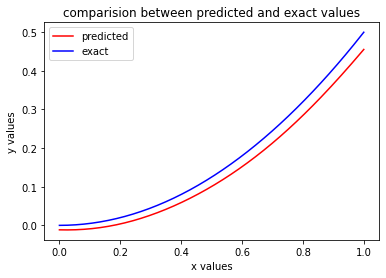

In [21]:
plt.plot(x,y_pred,color='r',label='predicted')
plt.plot(x,y_exact,color='b',label='exact')
plt.legend
plt.title('comparision between predicted and exact values')
plt.legend(loc='upper left')
plt.xlabel('x values')
plt.ylabel('y values')

In [15]:
out=loss(x,model)
print(out)

tf.Tensor(0.0012006565, shape=(), dtype=float32)
